In [1]:
#matplotlib inline

In [2]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob #to read the files
from sklearn.decomposition import PCA
from ipywidgets import *
from tabulate import tabulate #to export in table format
from sklearn import preprocessing

In [3]:
x = np.linspace(-10,50,61)
y = np.linspace(3000,9000,601)

In [4]:
sn_names=glob.glob("./supcommwebv/*.dat")
print(len(sn_names))

34


In [5]:
sn_names[0]

'./supcommwebv/SN2006bt.dat'

In [6]:
X = []

In [7]:
max_sup = []

In [8]:
ll = []

In [9]:
new_names = []

In [10]:
sort = []

In [11]:
for k in range(0,len(sn_names)):
    
    file = open(sn_names[k])
    lines = file.readlines()
    file.close()

    xtemp = []

    for line in lines:

        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        xtemp.append(co[0])

    xtemp = np.array(xtemp, dtype=float)
    
    #xtemp = xtemp/max(xtemp)
        
    if max(xtemp) < 10:
        
        new_names.append(sn_names[k])
        ll.append(max(xtemp))
        z = np.reshape(xtemp, (601, 61))



        zz = []
        xx = []
        yy = []

        for i in range(0,len(y)):

            for j in range(0,len(x)):

                #if -9.5 < x[j] < 51:

                    #if 2999 < y[i] < 6999:

                zz.append(z[i][j])
                xx.append(x[j])
                yy.append(y[i])


        sort.append(sn_names[k][:-4])

        X.append(np.array(zz))


In [12]:
save_path = '/home/joao/Documents/'
name_of_file = 'trainingnamespca'
completeName = os.path.join(save_path, name_of_file+".dat")

f = open(completeName, 'w')

for i in range(0, len(new_names)):
    
    f.write(new_names[i]+'\n')
    
f.close()

In [13]:
ll

[0.0481247,
 0.149022,
 0.16354,
 0.0379892,
 1.0214,
 0.0668411,
 0.946861,
 0.0542988,
 0.413643,
 3.20578,
 1.51366,
 0.12204,
 1.59595,
 0.118705,
 5.21001,
 0.12193,
 0.171614,
 0.545919,
 0.125226,
 3.57158,
 0.724649,
 0.451631,
 0.170841,
 0.152931,
 1.9797,
 0.402154,
 2.28261,
 0.368507,
 0.116038,
 1.67853,
 0.99324,
 0.315974,
 0.259025,
 0.118957]

In [14]:
len(X)

34

In [15]:
np.sqrt(np.var(ll))

1.1716098611483807

In [16]:
hist = []
for i in range(0,len(ll)):
    
    if ll[i] < 100000000000:
    
        hist.append(ll[i]-np.mean(ll))

<IPython.core.display.Javascript object>


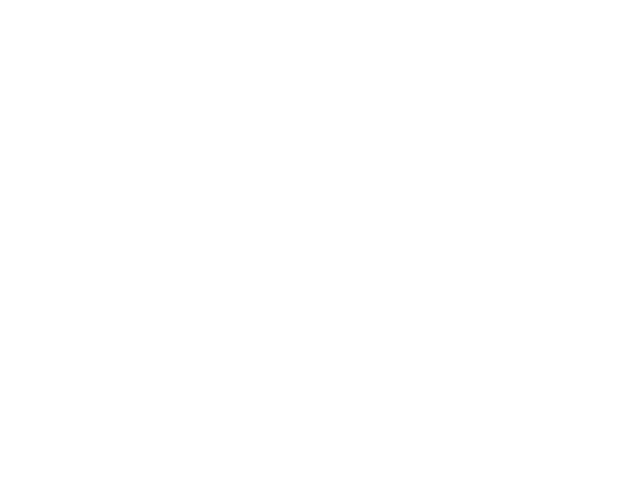

In [17]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.hist(hist, bins=30)
#plt.xlim(0,30)
plt.xlabel("contagem/s")
plt.ylabel("# de max")
plt.show()

In [18]:
np.mean(ll)

0.859380023529412

In [19]:
ll

[0.0481247,
 0.149022,
 0.16354,
 0.0379892,
 1.0214,
 0.0668411,
 0.946861,
 0.0542988,
 0.413643,
 3.20578,
 1.51366,
 0.12204,
 1.59595,
 0.118705,
 5.21001,
 0.12193,
 0.171614,
 0.545919,
 0.125226,
 3.57158,
 0.724649,
 0.451631,
 0.170841,
 0.152931,
 1.9797,
 0.402154,
 2.28261,
 0.368507,
 0.116038,
 1.67853,
 0.99324,
 0.315974,
 0.259025,
 0.118957]

In [20]:
x[10]

0.0

In [21]:
len(X)

34

In [22]:
N = 10

In [23]:
from numpy.random import RandomState

In [24]:
rng = RandomState(0)

pca = PCA(N, whiten=True)
pca.fit(X)

PCA(n_components=10, whiten=True)

In [25]:
pca.noise_variance_

0.22084517728711717

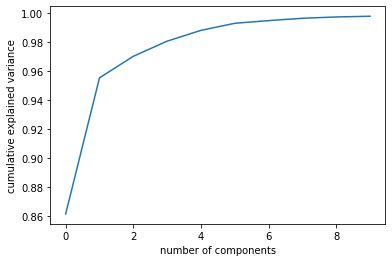

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [27]:
range(N)

range(0, 10)

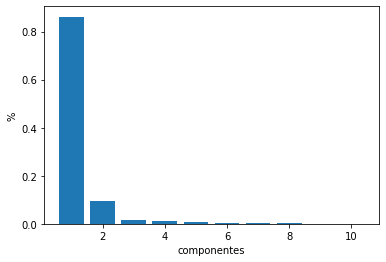

In [28]:
%matplotlib inline
plt.bar(np.linspace(1,N,N), pca.explained_variance_ratio_, alpha=1, align='center',label='individual explained variance')
plt.xlabel("componentes")
plt.ylabel("%")
plt.show()

## Soma das variancias relativas

### primeira

In [29]:
pca.explained_variance_ratio_[0]

0.861669584854878

### primeira e segunda

In [30]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.9555467427788608

### primeira, segunda e terceira

In [31]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]

0.9704240520647275

In [32]:
'''
fig, axes = plt.subplots(2, 2, figsize=(10, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(601, 61), cmap='bone',aspect='auto',interpolation = 'bilinear')
'''

"\nfig, axes = plt.subplots(2, 2, figsize=(10, 6),\n                         subplot_kw={'xticks':[], 'yticks':[]},\n                         gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i, ax in enumerate(axes.flat):\n    ax.imshow(pca.components_[i].reshape(601, 61), cmap='bone',aspect='auto',interpolation = 'bilinear')\n"

In [33]:
#pca = PCA(N).fit(X)
components = pca.transform(X)
projected = pca.inverse_transform(components)

In [34]:
pca.components_[0]

array([0.00028194, 0.00041269, 0.00055023, ..., 0.00039519, 0.00037944,
       0.00036539])

In [35]:
'''

fig, ax = plt.subplots(2, 2, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(2):
    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('25-dim\nreconstruction');
'''

"\n\nfig, ax = plt.subplots(2, 2, figsize=(10, 2.5),\n                       subplot_kw={'xticks':[], 'yticks':[]},\n                       gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i in range(2):\n    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    \nax[0, 0].set_ylabel('full-dim\ninput')\nax[1, 0].set_ylabel('25-dim\nreconstruction');\n"

In [36]:
x_grid = np.linspace(-10,50,61)
y_grid = np.linspace(3000,9000, 601)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

# Media da distribuição realizada pelo pca

<IPython.core.display.Javascript object>


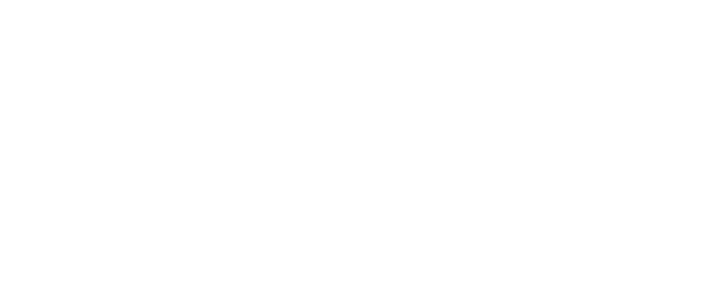

<IPython.core.display.Javascript object>


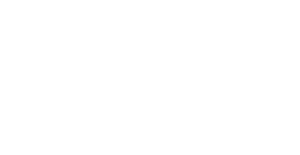

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

Z = interp.griddata((xx,yy),pca.mean_,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10, 4))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

# Componentes

In [79]:
optionslist = []

for i in range(0,N):
    
    optionslist.append(i)

<IPython.core.display.Javascript object>


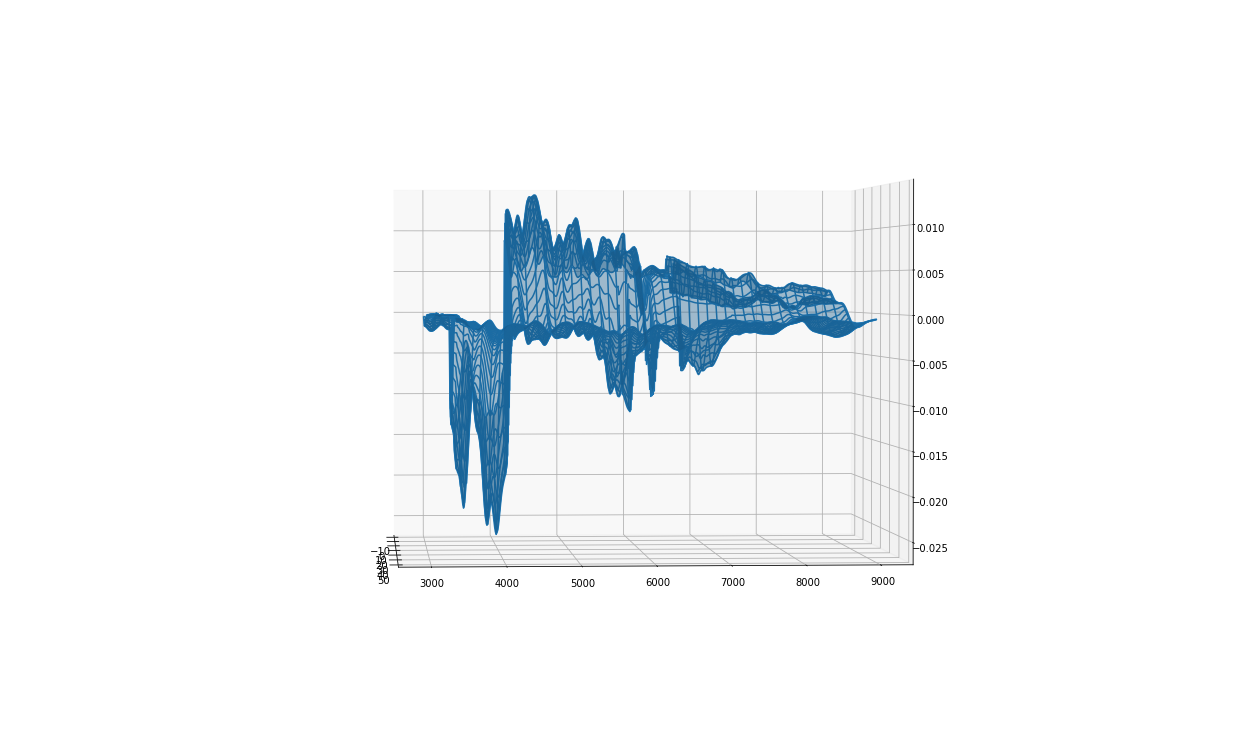

interactive(children=(Dropdown(description='Component:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=0), Out…

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

fig = plt.figure(figsize=(10, 4))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),pca.components_[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)
    #ax.scatter3D(xx,yy,pca.components_[i], c='r')
    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    #ax.set_zlim([0, 0.04])
    plt.show()
    
i = widgets.Dropdown(options=optionslist, value=0, description='Component:', disabled=False)

widgets.interactive(update_graph,i = i)

# Superficies com N componentes

In [40]:
optionslistsup = []

for i in range(0,len(X)):
    
    optionslistsup.append(i)

<IPython.core.display.Javascript object>


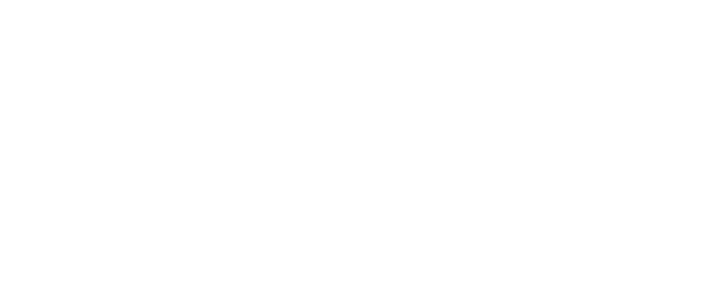

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [41]:
%matplotlib notebook

fig = plt.figure(figsize=(10,4))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),projected[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsup, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)


# Superficies originais

In [77]:
optionslistsupori = []

for i in range(0,len(X)):
    
    optionslistsupori.append(i)

<IPython.core.display.Javascript object>


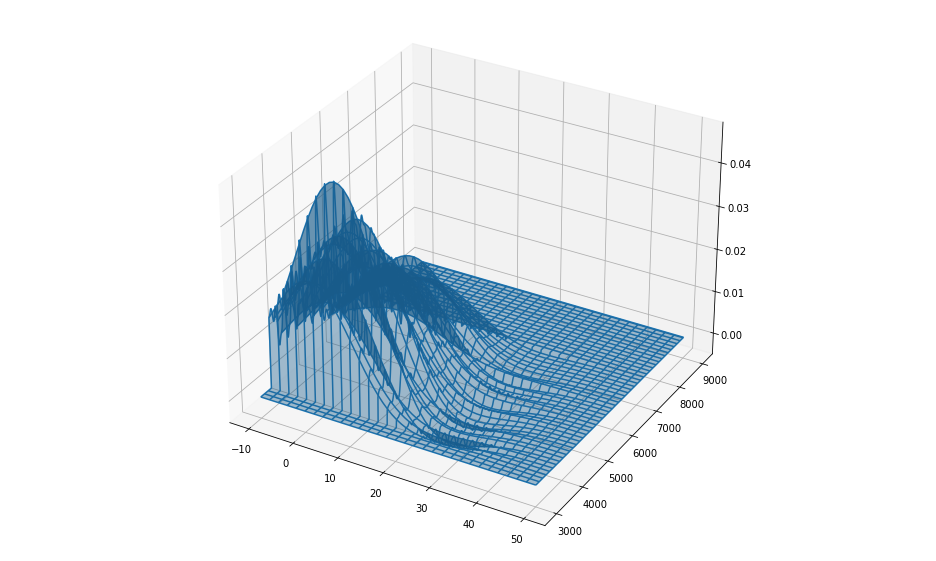

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [78]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),X[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    #ax.scatter3D(xx, yy, X[i], c='r')
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsupori, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)

In [44]:
new_names[0]

'./supcommwebv/SN2006bt.dat'

In [45]:
len(pca.components_[0])

36661

In [46]:
projectedt = projected.T

In [47]:
projectedt[0]

array([ 3.94970435e-03,  7.13123560e-03,  3.33127016e-03,  4.26012916e-03,
        1.59892844e-03,  4.99997388e-03, -1.06591937e-03,  4.43438309e-03,
        5.08419467e-04, -2.66708197e-04,  4.25041466e-03,  5.06390091e-03,
        6.66049431e-03,  2.83498903e-03,  4.39806385e-04,  9.93275131e-03,
        3.39508283e-03, -6.30006522e-03,  5.53010589e-03,  4.23390712e-04,
        2.94816092e-02, -7.49482972e-03,  5.52003432e-03,  5.53344421e-03,
       -9.26725764e-03,  2.08502107e-03,  3.31216024e-01,  2.84769860e-03,
        2.86181308e-03, -3.21818193e-03, -1.87655250e-03,  3.25086179e-02,
        7.26207702e-03,  7.47019453e-03])

In [48]:
def cube(x):
    if x >= 0:
        return x**(1/3)
    elif x < 0:
        return -(abs(x)**(1/3))

In [49]:
mean_list = []
sigma_list = []
sk_list = []
for i in range(0, len(projectedt)):
    
    mean = 0
    desv = 0
    sk = 0
    
    
    for k in range(0, len(projectedt[i])):
        
        mean += projectedt[i][k]
        desv += (projectedt[i][k] - np.mean(projectedt[i]))**2
        sk += (projectedt[i][k] - np.mean(projectedt[i]))**3
        
    
    
    mean_list.append(np.mean(projectedt[i]))
    sigma_list.append(np.sqrt(desv/len(projectedt[i])))
    sk_list.append(cube(sk/len(projectedt[i])))
    
    
    

In [50]:
len(sk_list)

36661

<IPython.core.display.Javascript object>


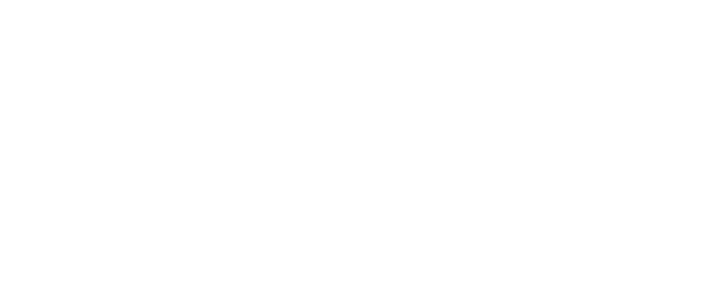

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

Z = interp.griddata((xx,yy),sk_list,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10, 4))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

In [52]:
sk_list

[0.09794947472255632,
 0.1383447125396583,
 0.18052733247728497,
 0.222457732179202,
 0.26192320145942594,
 0.29673714273183677,
 0.3249448096407789,
 0.3450217204600852,
 0.3560293275805731,
 0.35771583172204974,
 0.3505230040228901,
 0.3355318881062619,
 0.3143200826435421,
 0.2887695923074004,
 0.26085044464460755,
 0.23240315800454242,
 0.20497021810526253,
 0.1796698470765407,
 0.15714771116900966,
 0.13760124482891942,
 0.12085970001878486,
 0.10650410628432395,
 0.09400139069189538,
 0.08283062816531186,
 0.07257884269340445,
 0.0629957117043931,
 0.05400588975782594,
 0.04568192813590009,
 0.038192025349966935,
 0.03173482285792872,
 0.026476857992414605,
 0.022505426705985557,
 0.019803072622721875,
 0.018244105839096473,
 0.017612524493175047,
 0.017633711291379223,
 0.01801201485670274,
 0.018469356970461745,
 0.01877511957332418,
 0.018765577832021606,
 0.018351175343817888,
 0.017513285001657962,
 0.01629118326504713,
 0.014766105105221299,
 0.013041732203507147,
 0.011227

In [53]:
Z = interp.griddata((xx,yy),pca.components_[0],(B1,B2),method='cubic')

In [54]:
len(Z)

601

In [55]:
teste = Z.transpose()

In [56]:
len(teste)

61

In [57]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [58]:
#exp_z = exp_z/max(exp_z)

In [59]:
save_path = '/home/joao/Documents'

In [60]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M0.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [61]:
Z = interp.griddata((xx,yy),pca.components_[1],(B1,B2),method='cubic')

In [62]:
teste = Z.transpose()

In [63]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [64]:
#exp_z = exp_z/max(exp_z)

In [65]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M1.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [66]:
Z = interp.griddata((xx,yy),pca.components_[2],(B1,B2),method='cubic')

In [67]:
teste = Z.transpose()

In [68]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [69]:
#exp_z = exp_z/max(exp_z)

In [70]:
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [71]:
'''
arrays = [np.array(u) for u in X]

from scipy.stats import skew


med = [np.mean(k) for k in zip(*arrays)]
var = [np.var(k) for k in zip(*arrays)]
skewness = [skew(k) for k in zip(*arrays)]

%matplotlib notebook

Z = interp.griddata((xx,yy),med,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

Z = interp.griddata((xx,yy),skewness,(B1,B2),method='cubic')

teste = Z.transpose()

exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2mod.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()
'''

'\narrays = [np.array(u) for u in X]\n\nfrom scipy.stats import skew\n\n\nmed = [np.mean(k) for k in zip(*arrays)]\nvar = [np.var(k) for k in zip(*arrays)]\nskewness = [skew(k) for k in zip(*arrays)]\n\n%matplotlib notebook\n\nZ = interp.griddata((xx,yy),med,(B1,B2),method=\'cubic\')\n#Z = splinemean(B1, B2)\nfig = plt.figure(figsize=(10,6))\nax = axes3d.Axes3D(fig)\nax.plot_wireframe(B1, B2, Z)\nax.plot_surface(B1, B2, Z,alpha=0.4)\n#ax.scatter3D(xx,yy,pca.components_[0], c=\'r\')\n#ax3.set_xlim(3500, 7500)\n#ax3.set_ylim(-10, 50)\n#ax.set_zlim(0, max(pca.components_[1]))\n\nplt.show()\n\nZ = interp.griddata((xx,yy),skewness,(B1,B2),method=\'cubic\')\n\nteste = Z.transpose()\n\nexp_x = []\nexp_y = []\nexp_z = []\n\nfor i in range(0,len(x)):\n    \n    for j in range(0,len(y)):\n        \n        exp_x.append(x[i])\n        exp_y.append(y[j])\n        exp_z.append(teste[i][j])\n\ntable = []\nfor l in range(0,len(exp_x)):\n    table.append((exp_x[l],exp_y[l],exp_z[l]))\n\n\ncompleteName

In [72]:
density = []

In [73]:
for i in range(0,len(X[0])):
    
    count = 0
    
    for j in range(0,len(X)):
        
        if X[j][i] != 0:
            
            count += 1

    density.append(count)

In [74]:
zd = np.reshape(density, (601, 61))

In [75]:
zzd = []
xxd = []
yyd = []

for i in range(0,len(x)):

    for j in range(0,len(y)):

        zzd.append(zd[j][i])
        xxd.append(y[j])
        yyd.append(x[i])


<IPython.core.display.Javascript object>


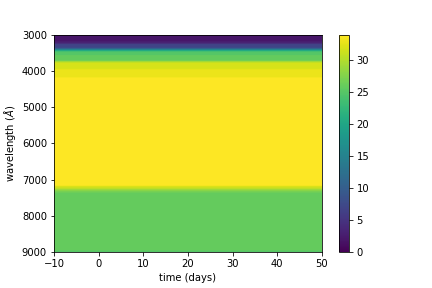

In [76]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib notebook
z = np.reshape(zzd, (61, 601)).T
plt.imshow(z, extent=(np.amin(yyd), np.amax(yyd), np.amax(xxd), np.amin(xxd)), cmap=cm.viridis, aspect='auto', interpolation = 'bilinear')
plt.colorbar()
plt.clim(0,34)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')
plt.savefig('densityplot.png')
plt.show()